Data Basis:
The data basis is a .csv-file from the National Energy System Operater (NESO) in the UK.
https://api.neso.energy/dataset/88313ae5-94e4-4ddc-a790-593554d8c6b9/resource/f93d1835-75bc-43e5-84ad-12472b180a98/download/df_fuel_ckan.csv
Notice: The data basis is updated every hour

Target:
1. Overview about the development of the power generation mix by generation type
2. Analysis of the wind and solar power production to see their role in the mix

In [1]:
import pandas as pd # to work with dataframes, manipulate data (panel data)
import matplotlib.pyplot as plt # viz library
import seaborn as sns # HD viz library
import numpy as np # to work with numbers (numerical python)
import squarify # for treemap

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# Loading the dataset 
data = pd.read_csv("https://api.neso.energy/dataset/88313ae5-94e4-4ddc-a790-593554d8c6b9/resource/f93d1835-75bc-43e5-84ad-12472b180a98/download/df_fuel_ckan.csv")
df = data.copy()

df.head()

,DATETIME,GAS,COAL,NUCLEAR,WIND,HYDRO,IMPORTS,BIOMASS,OTHER,SOLAR,STORAGE,GENERATION,CARBON_INTENSITY,LOW_CARBON,ZERO_CARBON,RENEWABLE,FOSSIL,GAS_perc,COAL_perc,NUCLEAR_perc,WIND_perc,HYDRO_perc,IMPORTS_perc,BIOMASS_perc,OTHER_perc,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc
0,2009-01-01T00:00:00,8377.0,15037.0,7099.0,294.0,246,2520.0,0.0,0.0,0.0,0,33572.0,525.0,7639.0,7639.0,540.0,23414.0,25.0,44.8,21.1,0.9,0.7,7.5,0.0,0.0,0.0,0.0,100.0,22.8,22.8,1.6,69.7
1,2009-01-01T00:30:00,8509.0,15095.0,7087.0,271.0,245,2498.0,0.0,0.0,0.0,0,33705.0,526.0,7603.0,7603.0,516.0,23604.0,25.2,44.8,21.0,0.8,0.7,7.4,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.5,70.0
2,2009-01-01T01:00:00,8483.0,15087.0,7074.0,244.0,246,2468.0,0.0,0.0,0.0,0,33602.0,527.0,7564.0,7564.0,490.0,23570.0,25.2,44.9,21.1,0.7,0.7,7.3,0.0,0.0,0.0,0.0,100.0,22.5,22.5,1.5,70.1
3,2009-01-01T01:30:00,8327.0,15030.0,7064.0,226.0,246,2441.0,0.0,0.0,0.0,0,33334.0,527.0,7536.0,7536.0,472.0,23357.0,25.0,45.1,21.2,0.7,0.7,7.3,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.4,70.1
4,2009-01-01T02:00:00,8302.0,14998.0,7052.0,208.0,246,2367.0,0.0,0.0,0.0,0,33172.0,528.0,7506.0,7506.0,454.0,23300.0,25.0,45.2,21.3,0.6,0.7,7.1,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.4,70.2


In [3]:
df.tail()

,DATETIME,GAS,COAL,NUCLEAR,WIND,HYDRO,IMPORTS,BIOMASS,OTHER,SOLAR,STORAGE,GENERATION,CARBON_INTENSITY,LOW_CARBON,ZERO_CARBON,RENEWABLE,FOSSIL,GAS_perc,COAL_perc,NUCLEAR_perc,WIND_perc,HYDRO_perc,IMPORTS_perc,BIOMASS_perc,OTHER_perc,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc
283611,2025-03-06T13:30:00,3487.0,0.0,4161.0,14958.0,394,7764.0,1137.0,386.0,7050.0,0,39337.0,60.0,27700.0,26563.0,22402.0,3487.0,8.9,0.0,10.6,38.0,1.0,19.7,2.9,1.0,17.9,0.0,100.0,70.4,67.5,56.9,8.9
283612,2025-03-06T14:00:00,4138.0,0.0,4156.0,15645.0,395,6238.0,1137.0,349.0,5897.0,0,37955.0,61.0,27230.0,26093.0,21937.0,4138.0,10.9,0.0,10.9,41.2,1.0,16.4,3.0,0.9,15.5,0.0,100.0,71.7,68.7,57.8,10.9
283613,2025-03-06T14:30:00,4932.0,0.0,4107.0,16029.0,388,6080.0,1135.0,289.0,4879.0,0,37839.0,67.0,26538.0,25403.0,21296.0,4932.0,13.0,0.0,10.9,42.4,1.0,16.1,3.0,0.8,12.9,0.0,100.0,70.1,67.1,56.3,13.0
283614,2025-03-06T15:00:00,6436.0,0.0,4074.0,16085.0,409,4712.0,1147.0,289.0,3787.0,0,36939.0,76.0,25502.0,24355.0,20281.0,6436.0,17.4,0.0,11.0,43.5,1.1,12.8,3.1,0.8,10.3,0.0,100.0,69.0,65.9,54.9,17.4
283615,2025-03-06T15:30:00,8065.0,0.0,4073.0,16383.0,430,4692.0,1151.0,219.0,2588.0,0,37601.0,92.0,24625.0,23474.0,19401.0,8065.0,21.4,0.0,10.8,43.6,1.1,12.5,3.1,0.6,6.9,0.0,100.0,65.5,62.4,51.6,21.4


In [4]:
df.sample(10)

,DATETIME,GAS,COAL,NUCLEAR,WIND,HYDRO,IMPORTS,BIOMASS,OTHER,SOLAR,STORAGE,GENERATION,CARBON_INTENSITY,LOW_CARBON,ZERO_CARBON,RENEWABLE,FOSSIL,GAS_perc,COAL_perc,NUCLEAR_perc,WIND_perc,HYDRO_perc,IMPORTS_perc,BIOMASS_perc,OTHER_perc,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc
220979,2021-08-09T17:30:00,13848.0,1000.0,4116.0,4554.0,322,5038.0,2325.0,521.0,1075.0,338,33137.0,219.0,12392.0,10067.0,5951.0,14848.0,41.8,3.0,12.4,13.7,1.0,15.2,7.0,1.6,3.2,1.0,100.0,37.4,30.4,18.0,44.8
230478,2022-02-23T15:00:00,6484.0,1960.0,4771.0,17852.0,758,3009.0,2867.0,179.0,1365.0,248,39493.0,132.0,27613.0,24746.0,19975.0,8444.0,16.4,5.0,12.1,45.2,1.9,7.6,7.3,0.5,3.5,0.6,100.0,69.9,62.7,50.6,21.4
98537,2014-08-15T20:30:00,15168.0,5545.0,6111.0,1774.0,495,2966.0,0.0,746.0,0.0,306,33111.0,361.0,8380.0,8380.0,2269.0,20713.0,45.8,16.7,18.5,5.4,1.5,9.0,0.0,2.3,0.0,0.9,100.0,25.3,25.3,6.9,62.6
250540,2023-04-17T14:00:00,16446.0,0.0,4777.0,3560.0,205,2996.0,2201.0,225.0,4401.0,0,34811.0,211.0,15144.0,12943.0,8166.0,16446.0,47.2,0.0,13.7,10.2,0.6,8.6,6.3,0.6,12.6,0.0,100.0,43.5,37.2,23.5,47.2
173876,2018-12-02T10:00:00,13070.0,1569.0,5989.0,7095.0,885,3026.0,1906.0,69.0,1102.0,140,34851.0,211.0,16977.0,15071.0,9082.0,14639.0,37.5,4.5,17.2,20.4,2.5,8.7,5.5,0.2,3.2,0.4,100.0,48.7,43.2,26.1,42.0
278292,2024-11-15T18:00:00,16284.0,0.0,4790.0,13610.0,349,3206.0,2785.0,504.0,0.0,482,42010.0,171.0,21534.0,18749.0,13959.0,16284.0,38.8,0.0,11.4,32.4,0.8,7.6,6.6,1.2,0.0,1.1,100.0,51.3,44.6,33.2,38.8
253134,2023-06-10T15:00:00,3650.0,0.0,5235.0,13093.0,166,1816.0,621.0,136.0,5165.0,0,29882.0,56.0,24280.0,23659.0,18424.0,3650.0,12.2,0.0,17.5,43.8,0.6,6.1,2.1,0.5,17.3,0.0,100.0,81.3,79.2,61.7,12.2
254424,2023-07-07T12:00:00,5017.0,0.0,5278.0,8277.0,147,3780.0,1306.0,154.0,10281.0,142,34382.0,74.0,25289.0,23983.0,18705.0,5017.0,14.6,0.0,15.4,24.1,0.4,11.0,3.8,0.4,29.9,0.4,100.0,73.6,69.8,54.4,14.6
188726,2019-10-07T19:00:00,14239.0,757.0,6751.0,12022.0,801,1192.0,1768.0,85.0,0.0,1198,38814.0,174.0,21342.0,19574.0,12823.0,14996.0,36.7,2.0,17.4,31.0,2.1,3.1,4.6,0.2,0.0,3.1,100.0,55.0,50.4,33.0,38.6
237218,2022-07-14T01:00:00,13692.0,769.0,4812.0,2957.0,89,1902.0,2163.0,155.0,0.0,0,26539.0,251.0,10021.0,7858.0,3046.0,14461.0,51.6,2.9,18.1,11.1,0.3,7.2,8.2,0.6,0.0,0.0,100.0,37.8,29.6,11.5,54.5


In [5]:
df.shape

(283616, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283616 entries, 0 to 283615
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATETIME          283616 non-null  object 
 1   GAS               283616 non-null  float64
 2   COAL              283616 non-null  float64
 3   NUCLEAR           283616 non-null  float64
 4   WIND              283616 non-null  float64
 5   HYDRO             283616 non-null  int64  
 6   IMPORTS           283616 non-null  float64
 7   BIOMASS           283616 non-null  float64
 8   OTHER             283616 non-null  float64
 9   SOLAR             283616 non-null  float64
 10  STORAGE           283616 non-null  int64  
 11  GENERATION        283616 non-null  float64
 12  CARBON_INTENSITY  283616 non-null  float64
 13  LOW_CARBON        283616 non-null  float64
 14  ZERO_CARBON       283616 non-null  float64
 15  RENEWABLE         283616 non-null  float64
 16  FOSSIL            28

Data Cleaning

In [7]:
df.isna().sum()

DATETIME            0
GAS                 0
COAL                0
NUCLEAR             0
WIND                0
HYDRO               0
IMPORTS             0
BIOMASS             0
OTHER               0
SOLAR               0
STORAGE             0
GENERATION          0
CARBON_INTENSITY    0
LOW_CARBON          0
ZERO_CARBON         0
RENEWABLE           0
FOSSIL              0
GAS_perc            0
COAL_perc           0
NUCLEAR_perc        0
WIND_perc           0
HYDRO_perc          0
IMPORTS_perc        0
BIOMASS_perc        0
OTHER_perc          0
SOLAR_perc          0
STORAGE_perc        0
GENERATION_perc     0
LOW_CARBON_perc     0
ZERO_CARBON_perc    0
RENEWABLE_perc      0
FOSSIL_perc         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.eq(" ").sum()

DATETIME            0
GAS                 0
COAL                0
NUCLEAR             0
WIND                0
HYDRO               0
IMPORTS             0
BIOMASS             0
OTHER               0
SOLAR               0
STORAGE             0
GENERATION          0
CARBON_INTENSITY    0
LOW_CARBON          0
ZERO_CARBON         0
RENEWABLE           0
FOSSIL              0
GAS_perc            0
COAL_perc           0
NUCLEAR_perc        0
WIND_perc           0
HYDRO_perc          0
IMPORTS_perc        0
BIOMASS_perc        0
OTHER_perc          0
SOLAR_perc          0
STORAGE_perc        0
GENERATION_perc     0
LOW_CARBON_perc     0
ZERO_CARBON_perc    0
RENEWABLE_perc      0
FOSSIL_perc         0
dtype: int64

In [10]:
df.nunique()

DATETIME            283616
GAS                  23732
COAL                 23810
NUCLEAR               6717
WIND                 19967
HYDRO                 1323
IMPORTS               7364
BIOMASS               3160
OTHER                 2423
SOLAR                 9183
STORAGE               1297
GENERATION           33331
CARBON_INTENSITY       616
LOW_CARBON           23676
ZERO_CARBON          22184
RENEWABLE            22230
FOSSIL               40055
GAS_perc               692
COAL_perc              595
NUCLEAR_perc           371
WIND_perc              696
HYDRO_perc              45
IMPORTS_perc           347
BIOMASS_perc           160
OTHER_perc             104
SOLAR_perc             365
STORAGE_perc            71
GENERATION_perc          1
LOW_CARBON_perc        807
ZERO_CARBON_perc       776
RENEWABLE_perc         736
FOSSIL_perc            856
dtype: int64

In [11]:
df.columns = df.columns.str.lower()

df.head()

,datetime,gas,coal,nuclear,wind,hydro,imports,biomass,other,solar,storage,generation,carbon_intensity,low_carbon,zero_carbon,renewable,fossil,gas_perc,coal_perc,nuclear_perc,wind_perc,hydro_perc,imports_perc,biomass_perc,other_perc,solar_perc,storage_perc,generation_perc,low_carbon_perc,zero_carbon_perc,renewable_perc,fossil_perc
0,2009-01-01T00:00:00,8377.0,15037.0,7099.0,294.0,246,2520.0,0.0,0.0,0.0,0,33572.0,525.0,7639.0,7639.0,540.0,23414.0,25.0,44.8,21.1,0.9,0.7,7.5,0.0,0.0,0.0,0.0,100.0,22.8,22.8,1.6,69.7
1,2009-01-01T00:30:00,8509.0,15095.0,7087.0,271.0,245,2498.0,0.0,0.0,0.0,0,33705.0,526.0,7603.0,7603.0,516.0,23604.0,25.2,44.8,21.0,0.8,0.7,7.4,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.5,70.0
2,2009-01-01T01:00:00,8483.0,15087.0,7074.0,244.0,246,2468.0,0.0,0.0,0.0,0,33602.0,527.0,7564.0,7564.0,490.0,23570.0,25.2,44.9,21.1,0.7,0.7,7.3,0.0,0.0,0.0,0.0,100.0,22.5,22.5,1.5,70.1
3,2009-01-01T01:30:00,8327.0,15030.0,7064.0,226.0,246,2441.0,0.0,0.0,0.0,0,33334.0,527.0,7536.0,7536.0,472.0,23357.0,25.0,45.1,21.2,0.7,0.7,7.3,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.4,70.1
4,2009-01-01T02:00:00,8302.0,14998.0,7052.0,208.0,246,2367.0,0.0,0.0,0.0,0,33172.0,528.0,7506.0,7506.0,454.0,23300.0,25.0,45.2,21.3,0.6,0.7,7.1,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.4,70.2


In [12]:
#checking if there are only imports or also exports
has_negative_values = (df['imports'] < 0).any()
print(has_negative_values)

False


In [13]:
#checking if generation equals demand
df["sum_generation"] = df[["gas", "coal", "nuclear", "wind", "hydro", "imports", "biomass", "other", "solar", "storage"]].sum(axis=1)
result1 = df['sum_generation'] - df['generation']
result2 = result1 <2 #including rounding errors in the data

matching_count = result2.sum()
print(f"Number of matching rows: {matching_count}")
df.shape[0] 
#sometimes its not completly matching because it is uncompleted live data





Number of matching rows: 283603


283616

In [14]:
df = df.drop(columns=['sum_generation'])

In [15]:
#renaming generation to demand because imports are no generation by definition
df = df.rename(columns={'generation': 'demand'})
df = df.rename(columns={'generation_perc': 'demand_perc'})

In [16]:
df['generation'] = df['demand']

# Von der Spalte 'generation' die Werte der Spalte 'Import' abziehen
df['generation'] = df.apply(lambda row: row['generation'] - row['imports'], axis=1)

df.head(5)

,datetime,gas,coal,nuclear,wind,hydro,imports,biomass,other,solar,storage,demand,carbon_intensity,low_carbon,zero_carbon,renewable,fossil,gas_perc,coal_perc,nuclear_perc,wind_perc,hydro_perc,imports_perc,biomass_perc,other_perc,solar_perc,storage_perc,demand_perc,low_carbon_perc,zero_carbon_perc,renewable_perc,fossil_perc,generation
0,2009-01-01T00:00:00,8377.0,15037.0,7099.0,294.0,246,2520.0,0.0,0.0,0.0,0,33572.0,525.0,7639.0,7639.0,540.0,23414.0,25.0,44.8,21.1,0.9,0.7,7.5,0.0,0.0,0.0,0.0,100.0,22.8,22.8,1.6,69.7,31052.0
1,2009-01-01T00:30:00,8509.0,15095.0,7087.0,271.0,245,2498.0,0.0,0.0,0.0,0,33705.0,526.0,7603.0,7603.0,516.0,23604.0,25.2,44.8,21.0,0.8,0.7,7.4,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.5,70.0,31207.0
2,2009-01-01T01:00:00,8483.0,15087.0,7074.0,244.0,246,2468.0,0.0,0.0,0.0,0,33602.0,527.0,7564.0,7564.0,490.0,23570.0,25.2,44.9,21.1,0.7,0.7,7.3,0.0,0.0,0.0,0.0,100.0,22.5,22.5,1.5,70.1,31134.0
3,2009-01-01T01:30:00,8327.0,15030.0,7064.0,226.0,246,2441.0,0.0,0.0,0.0,0,33334.0,527.0,7536.0,7536.0,472.0,23357.0,25.0,45.1,21.2,0.7,0.7,7.3,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.4,70.1,30893.0
4,2009-01-01T02:00:00,8302.0,14998.0,7052.0,208.0,246,2367.0,0.0,0.0,0.0,0,33172.0,528.0,7506.0,7506.0,454.0,23300.0,25.0,45.2,21.3,0.6,0.7,7.1,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.4,70.2,30805.0


Data Manipulation

In [17]:
df['datetime'] = pd.to_datetime(df['datetime'])

# extract year, month, weekday and time
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.strftime('%b')  
df['weekday'] = df['datetime'].dt.strftime('%a')  
df['time'] = df['datetime'].dt.strftime('%H:%M') 



df.tail()

,datetime,gas,coal,nuclear,wind,hydro,imports,biomass,other,solar,storage,demand,carbon_intensity,low_carbon,zero_carbon,renewable,fossil,gas_perc,coal_perc,nuclear_perc,wind_perc,hydro_perc,imports_perc,biomass_perc,other_perc,solar_perc,storage_perc,demand_perc,low_carbon_perc,zero_carbon_perc,renewable_perc,fossil_perc,generation,year,month,weekday,time
283611,2025-03-06 13:30:00,3487.0,0.0,4161.0,14958.0,394,7764.0,1137.0,386.0,7050.0,0,39337.0,60.0,27700.0,26563.0,22402.0,3487.0,8.9,0.0,10.6,38.0,1.0,19.7,2.9,1.0,17.9,0.0,100.0,70.4,67.5,56.9,8.9,31573.0,2025,Mar,Thu,13:30
283612,2025-03-06 14:00:00,4138.0,0.0,4156.0,15645.0,395,6238.0,1137.0,349.0,5897.0,0,37955.0,61.0,27230.0,26093.0,21937.0,4138.0,10.9,0.0,10.9,41.2,1.0,16.4,3.0,0.9,15.5,0.0,100.0,71.7,68.7,57.8,10.9,31717.0,2025,Mar,Thu,14:00
283613,2025-03-06 14:30:00,4932.0,0.0,4107.0,16029.0,388,6080.0,1135.0,289.0,4879.0,0,37839.0,67.0,26538.0,25403.0,21296.0,4932.0,13.0,0.0,10.9,42.4,1.0,16.1,3.0,0.8,12.9,0.0,100.0,70.1,67.1,56.3,13.0,31759.0,2025,Mar,Thu,14:30
283614,2025-03-06 15:00:00,6436.0,0.0,4074.0,16085.0,409,4712.0,1147.0,289.0,3787.0,0,36939.0,76.0,25502.0,24355.0,20281.0,6436.0,17.4,0.0,11.0,43.5,1.1,12.8,3.1,0.8,10.3,0.0,100.0,69.0,65.9,54.9,17.4,32227.0,2025,Mar,Thu,15:00
283615,2025-03-06 15:30:00,8065.0,0.0,4073.0,16383.0,430,4692.0,1151.0,219.0,2588.0,0,37601.0,92.0,24625.0,23474.0,19401.0,8065.0,21.4,0.0,10.8,43.6,1.1,12.5,3.1,0.6,6.9,0.0,100.0,65.5,62.4,51.6,21.4,32909.0,2025,Mar,Thu,15:30


In [18]:
df.describe().columns

Index(['datetime', 'gas', 'coal', 'nuclear', 'wind', 'hydro', 'imports',
       'biomass', 'other', 'solar', 'storage', 'demand', 'carbon_intensity',
       'low_carbon', 'zero_carbon', 'renewable', 'fossil', 'gas_perc',
       'coal_perc', 'nuclear_perc', 'wind_perc', 'hydro_perc', 'imports_perc',
       'biomass_perc', 'other_perc', 'solar_perc', 'storage_perc',
       'demand_perc', 'low_carbon_perc', 'zero_carbon_perc', 'renewable_perc',
       'fossil_perc', 'generation', 'year'],
      dtype='object')

In [19]:
cols = ['datetime', 'gas', 'coal', 'nuclear', 'wind', 'hydro', 'imports',
       'biomass', 'other', 'solar', 'storage', 'demand', 'carbon_intensity',
       'low_carbon', 'zero_carbon', 'renewable', 'fossil', 'gas_perc',
       'coal_perc', 'nuclear_perc', 'wind_perc', 'hydro_perc', 'imports_perc',
       'biomass_perc', 'other_perc', 'solar_perc', 'storage_perc',
       'demand_perc', 'low_carbon_perc', 'zero_carbon_perc', 'renewable_perc',
       'fossil_perc', 'generation', 'year']

num = df[cols]

In [20]:
num = df.select_dtypes(include="number")
cat = df.select_dtypes(exclude="number")

In [21]:
num

,gas,coal,nuclear,wind,hydro,imports,biomass,other,solar,storage,demand,carbon_intensity,low_carbon,zero_carbon,renewable,fossil,gas_perc,coal_perc,nuclear_perc,wind_perc,hydro_perc,imports_perc,biomass_perc,other_perc,solar_perc,storage_perc,demand_perc,low_carbon_perc,zero_carbon_perc,renewable_perc,fossil_perc,generation,year
0,8377.0,15037.0,7099.0,294.0,246,2520.0,0.0,0.0,0.0,0,33572.0,525.0,7639.0,7639.0,540.0,23414.0,25.0,44.8,21.1,0.9,0.7,7.5,0.0,0.0,0.0,0.0,100.0,22.8,22.8,1.6,69.7,31052.0,2009
1,8509.0,15095.0,7087.0,271.0,245,2498.0,0.0,0.0,0.0,0,33705.0,526.0,7603.0,7603.0,516.0,23604.0,25.2,44.8,21.0,0.8,0.7,7.4,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.5,70.0,31207.0,2009
2,8483.0,15087.0,7074.0,244.0,246,2468.0,0.0,0.0,0.0,0,33602.0,527.0,7564.0,7564.0,490.0,23570.0,25.2,44.9,21.1,0.7,0.7,7.3,0.0,0.0,0.0,0.0,100.0,22.5,22.5,1.5,70.1,31134.0,2009
3,8327.0,15030.0,7064.0,226.0,246,2441.0,0.0,0.0,0.0,0,33334.0,527.0,7536.0,7536.0,472.0,23357.0,25.0,45.1,21.2,0.7,0.7,7.3,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.4,70.1,30893.0,2009
4,8302.0,14998.0,7052.0,208.0,246,2367.0,0.0,0.0,0.0,0,33172.0,528.0,7506.0,7506.0,454.0,23300.0,25.0,45.2,21.3,0.6,0.7,7.1,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.4,70.2,30805.0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283611,3487.0,0.0,4161.0,14958.0,394,7764.0,1137.0,386.0,7050.0,0,39337.0,60.0,27700.0,26563.0,22402.0,3487.0,8.9,0.0,10.6,38.0,1.0,19.7,2.9,1.0,17.9,0.0,100.0,70.4,67.5,56.9,8.9,31573.0,2025
283612,4138.0,0.0,4156.0,15645.0,395,6238.0,1137.0,349.0,5897.0,0,37955.0,61.0,27230.0,26093.0,21937.0,4138.0,10.9,0.0,10.9,41.2,1.0,16.4,3.0,0.9,15.5,0.0,100.0,71.7,68.7,57.8,10.9,31717.0,2025
283613,4932.0,0.0,4107.0,16029.0,388,6080.0,1135.0,289.0,4879.0,0,37839.0,67.0,26538.0,25403.0,21296.0,4932.0,13.0,0.0,10.9,42.4,1.0,16.1,3.0,0.8,12.9,0.0,100.0,70.1,67.1,56.3,13.0,31759.0,2025
283614,6436.0,0.0,4074.0,16085.0,409,4712.0,1147.0,289.0,3787.0,0,36939.0,76.0,25502.0,24355.0,20281.0,6436.0,17.4,0.0,11.0,43.5,1.1,12.8,3.1,0.8,10.3,0.0,100.0,69.0,65.9,54.9,17.4,32227.0,2025


In [22]:
cat = cat.drop(columns=['datetime'])
cat


,month,weekday,time
0,Jan,Thu,00:00
1,Jan,Thu,00:30
2,Jan,Thu,01:00
3,Jan,Thu,01:30
4,Jan,Thu,02:00
...,...,...,...
283611,Mar,Thu,13:30
283612,Mar,Thu,14:00
283613,Mar,Thu,14:30
283614,Mar,Thu,15:00


Data Analysis

In [23]:
frequency_table = df.groupby('year').agg({
    'gas': 'sum',   
    'coal': 'sum',
    'nuclear': 'sum',  
    'wind': 'sum', 
    'hydro': 'sum',
    'solar': 'sum',
    'biomass': 'sum',
    'storage': 'sum',
    'other': 'sum',
    'imports': 'sum'
}).round()

frequency_table


,gas,coal,nuclear,wind,hydro,solar,biomass,storage,other,imports
year,,,,,,,,,,
2009,294804707.0,197599142.0,130004123.0,8314780.0,7116428,0.0,0.0,7233584,0.0,13364233.0
2010,314178249.0,205672062.0,117022035.0,9209658.0,4276624,0.0,0.0,6248258,0.0,13757002.0
2011,254123891.0,206785032.0,129542217.0,23794029.0,7390411,0.0,0.0,5839310,0.0,17194918.0
2012,166154746.0,274335758.0,132031588.0,31029178.0,6549376,0.0,0.0,5819370,4183383.0,27470720.0
2013,160274531.0,251535315.0,131896484.0,42671961.0,5828794,4152618.0,0.0,5603992,7705056.0,35162962.0
2014,173235461.0,193358346.0,119543454.0,50812980.0,7849088,7825204.0,0.0,5600312,14945538.0,46616529.0
2015,168618439.0,148992803.0,131415278.0,63307679.0,8188877,14424454.0,0.0,5367658,22576515.0,46516625.0
2016,254565200.0,56040622.0,133602128.0,60576650.0,6758571,20001012.0,0.0,5726570,28394826.0,40559504.0
2017,238446559.0,41223039.0,131113349.0,88381608.0,7921093,20856156.0,4445182.0,5483664,24492103.0,38978417.0


In [24]:
#devide by 2 to make it an hourly unit
frequency_table_hourly = frequency_table / 2

frequency_table_hourly

,gas,coal,nuclear,wind,hydro,solar,biomass,storage,other,imports
year,,,,,,,,,,
2009,147402353.5,98799571.0,65002061.5,4157390.0,3558214.0,0.0,0.0,3616792.0,0.0,6682116.5
2010,157089124.5,102836031.0,58511017.5,4604829.0,2138312.0,0.0,0.0,3124129.0,0.0,6878501.0
2011,127061945.5,103392516.0,64771108.5,11897014.5,3695205.5,0.0,0.0,2919655.0,0.0,8597459.0
2012,83077373.0,137167879.0,66015794.0,15514589.0,3274688.0,0.0,0.0,2909685.0,2091691.5,13735360.0
2013,80137265.5,125767657.5,65948242.0,21335980.5,2914397.0,2076309.0,0.0,2801996.0,3852528.0,17581481.0
2014,86617730.5,96679173.0,59771727.0,25406490.0,3924544.0,3912602.0,0.0,2800156.0,7472769.0,23308264.5
2015,84309219.5,74496401.5,65707639.0,31653839.5,4094438.5,7212227.0,0.0,2683829.0,11288257.5,23258312.5
2016,127282600.0,28020311.0,66801064.0,30288325.0,3379285.5,10000506.0,0.0,2863285.0,14197413.0,20279752.0
2017,119223279.5,20611519.5,65556674.5,44190804.0,3960546.5,10428078.0,2222591.0,2741832.0,12246051.5,19489208.5


In [25]:
row_totals = frequency_table_hourly.sum(axis=1) 

proportion_table = (frequency_table_hourly.div(row_totals, axis=0)) * 100

proportion_table = proportion_table.round(1)

proportion_table

,gas,coal,nuclear,wind,hydro,solar,biomass,storage,other,imports
year,,,,,,,,,,
2009,44.8,30.0,19.7,1.3,1.1,0.0,0.0,1.1,0.0,2.0
2010,46.9,30.7,17.5,1.4,0.6,0.0,0.0,0.9,0.0,2.1
2011,39.4,32.1,20.1,3.7,1.1,0.0,0.0,0.9,0.0,2.7
2012,25.7,42.4,20.4,4.8,1.0,0.0,0.0,0.9,0.6,4.2
2013,24.9,39.0,20.5,6.6,0.9,0.6,0.0,0.9,1.2,5.5
2014,28.0,31.2,19.3,8.2,1.3,1.3,0.0,0.9,2.4,7.5
2015,27.7,24.4,21.6,10.4,1.3,2.4,0.0,0.9,3.7,7.6
2016,42.0,9.2,22.0,10.0,1.1,3.3,0.0,0.9,4.7,6.7
2017,39.7,6.9,21.8,14.7,1.3,3.5,0.7,0.9,4.1,6.5


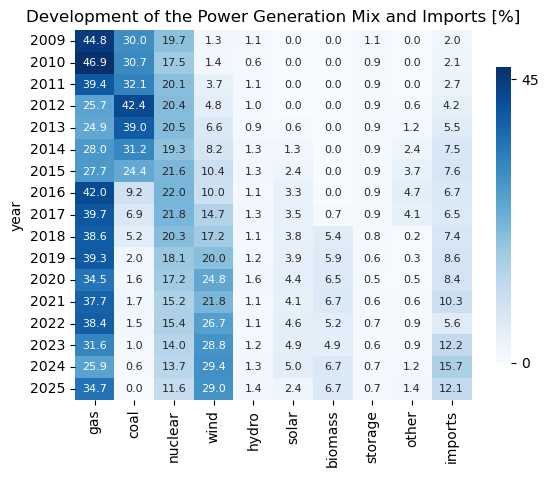

In [26]:
sns.heatmap(proportion_table, annot=True, cmap="Blues", annot_kws={"size": 8}, cbar_kws={"shrink": 0.8, 'ticks': [0, 45, 100]}, fmt=".1f")
plt.title('Development of the Power Generation Mix and Imports [%]')
plt.show()

A more close look into the years 2022 and 2025

In [27]:
df_filtered = df[df['year'].isin([2022, 2025])]
df_filtered

,datetime,gas,coal,nuclear,wind,hydro,imports,biomass,other,solar,storage,demand,carbon_intensity,low_carbon,zero_carbon,renewable,fossil,gas_perc,coal_perc,nuclear_perc,wind_perc,hydro_perc,imports_perc,biomass_perc,other_perc,solar_perc,storage_perc,demand_perc,low_carbon_perc,zero_carbon_perc,renewable_perc,fossil_perc,generation,year,month,weekday,time
227904,2022-01-01 00:00:00,2844.0,0.0,6799.0,12579.0,286,1502.0,1536.0,70.0,0.0,0,25616.0,63.0,21200.0,19664.0,12865.0,2844.0,11.1,0.0,26.5,49.1,1.1,5.9,6.0,0.3,0.0,0.0,100.0,82.8,76.8,50.2,11.1,24114.0,2022,Jan,Sat,00:00
227905,2022-01-01 00:30:00,2953.0,0.0,6800.0,13007.0,283,1500.0,1553.0,149.0,0.0,0,26245.0,64.0,21643.0,20090.0,13290.0,2953.0,11.3,0.0,25.9,49.6,1.1,5.7,5.9,0.6,0.0,0.0,100.0,82.5,76.5,50.6,11.3,24745.0,2022,Jan,Sat,00:30
227906,2022-01-01 01:00:00,2879.0,0.0,6808.0,13666.0,260,1328.0,1528.0,144.0,0.0,0,26613.0,62.0,22262.0,20734.0,13926.0,2879.0,10.8,0.0,25.6,51.4,1.0,5.0,5.7,0.5,0.0,0.0,100.0,83.7,77.9,52.3,10.8,25285.0,2022,Jan,Sat,01:00
227907,2022-01-01 01:30:00,2691.0,0.0,6804.0,13714.0,268,1126.0,1521.0,144.0,0.0,0,26268.0,58.0,22307.0,20786.0,13982.0,2691.0,10.2,0.0,25.9,52.2,1.0,4.3,5.8,0.5,0.0,0.0,100.0,84.9,79.1,53.2,10.2,25142.0,2022,Jan,Sat,01:30
227908,2022-01-01 02:00:00,3450.0,0.0,6796.0,14114.0,248,796.0,1602.0,88.0,0.0,0,27094.0,62.0,22760.0,21158.0,14362.0,3450.0,12.7,0.0,25.1,52.1,0.9,2.9,5.9,0.3,0.0,0.0,100.0,84.0,78.1,53.0,12.7,26298.0,2022,Jan,Sat,02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283611,2025-03-06 13:30:00,3487.0,0.0,4161.0,14958.0,394,7764.0,1137.0,386.0,7050.0,0,39337.0,60.0,27700.0,26563.0,22402.0,3487.0,8.9,0.0,10.6,38.0,1.0,19.7,2.9,1.0,17.9,0.0,100.0,70.4,67.5,56.9,8.9,31573.0,2025,Mar,Thu,13:30
283612,2025-03-06 14:00:00,4138.0,0.0,4156.0,15645.0,395,6238.0,1137.0,349.0,5897.0,0,37955.0,61.0,27230.0,26093.0,21937.0,4138.0,10.9,0.0,10.9,41.2,1.0,16.4,3.0,0.9,15.5,0.0,100.0,71.7,68.7,57.8,10.9,31717.0,2025,Mar,Thu,14:00
283613,2025-03-06 14:30:00,4932.0,0.0,4107.0,16029.0,388,6080.0,1135.0,289.0,4879.0,0,37839.0,67.0,26538.0,25403.0,21296.0,4932.0,13.0,0.0,10.9,42.4,1.0,16.1,3.0,0.8,12.9,0.0,100.0,70.1,67.1,56.3,13.0,31759.0,2025,Mar,Thu,14:30
283614,2025-03-06 15:00:00,6436.0,0.0,4074.0,16085.0,409,4712.0,1147.0,289.0,3787.0,0,36939.0,76.0,25502.0,24355.0,20281.0,6436.0,17.4,0.0,11.0,43.5,1.1,12.8,3.1,0.8,10.3,0.0,100.0,69.0,65.9,54.9,17.4,32227.0,2025,Mar,Thu,15:00


In [28]:
mean_demand = df_filtered.groupby(['weekday', 'time'])['demand'].mean().unstack()

mean_demand

time,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,05:00,05:30,06:00,06:30,07:00,07:30,08:00,08:30,09:00,09:30,10:00,10:30,11:00,11:30,12:00,12:30,13:00,13:30,14:00,14:30,15:00,15:30,16:00,16:30,17:00,17:30,18:00,18:30,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
weekday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Fri,28506.065574,28664.655738,28556.491803,28290.213115,28125.327869,28045.442623,27988.065574,27889.786885,27982.721311,28319.622951,28976.442623,30172.229508,31948.590164,33683.836066,35420.868852,36530.459016,37623.311475,38343.836066,39076.885246,39446.147541,39713.131148,39936.147541,40069.000000,39998.262295,40029.573770,39667.491803,39342.393443,38865.540984,38295.557377,37978.918033,37820.770492,37983.868852,38421.836066,38812.819672,39144.278689,39133.377049,38762.163934,38233.672131,37460.934426,36597.754098,35768.147541,34748.901639,33684.016393,32387.901639,30779.852459,29546.868852,28549.000000,27832.622951
Mon,27239.672131,27358.311475,27204.229508,26926.737705,26764.393443,26617.098361,26584.131148,26481.442623,26657.672131,27049.016393,28142.131148,29492.016393,31328.262295,33157.508197,34735.688525,35845.213115,36834.000000,37564.901639,38407.606557,38817.508197,39089.590164,39383.901639,39626.409836,39567.377049,39556.360656,39382.163934,39260.868852,38857.180328,38475.491803,38229.918033,38193.409836,38514.409836,39082.229508,39568.393443,39916.409836,39903.770492,39574.901639,39003.360656,38288.885246,37373.672131,36492.770492,35296.934426,34197.721311,32702.000000,31200.885246,29896.147541,28964.918033,28324.590164
Sat,27503.225806,27520.661290,27239.967742,26869.016129,26683.887097,26493.548387,26303.080645,26090.467742,26039.548387,26128.354839,26446.129032,26959.145161,27793.354839,28723.661290,29816.967742,30826.306452,31989.903226,32962.209677,33962.274194,34528.645161,34930.048387,35191.258065,35401.467742,35446.516129,35378.048387,35157.532258,34828.500000,34437.580645,34119.500000,33907.322581,33906.822581,34158.725806,34779.435484,35396.370968,35880.612903,35956.403226,35708.677419,35203.677419,34569.177419,33816.661290,33124.661290,32310.661290,31465.693548,30467.096774,29194.725806,28148.064516,27176.435484,26552.967742
Sun,26313.704918,26388.065574,26163.032787,25766.344262,25553.573770,25375.163934,25226.065574,25050.196721,24996.065574,24982.950820,25122.885246,25492.344262,25988.016393,26685.934426,27560.278689,28459.836066,29594.278689,30731.311475,31913.360656,32714.868852,33478.196721,34036.409836,34428.131148,34696.704918,34820.213115,34772.885246,34545.590164,34284.442623,34083.377049,34081.065574,34217.360656,34628.639344,35297.295082,35956.950820,36446.016393,36485.344262,36160.032787,35697.524590,35040.180328,34246.344262,33548.377049,32601.409836,31744.049180,30586.163934,29654.393443,28604.672131,27850.475410,27359.573770
Thu,28685.935484,28823.564516,28636.209677,28297.693548,28046.741935,27891.951613,27847.548387,27751.032258,27843.322581,28186.822581,29028.467742,30383.225806,32229.435484,34132.080645,35702.032258,36784.032258,37799.338710,38413.322581,39088.838710,39475.564516,39769.290323,39943.225806,40241.887097,40290.080645,40244.822581,40043.112903,39757.403226,39351.564516,38967.290323,38796.532258,38694.548387,38898.919355,39348.213115,39780.409836,40103.754098,40058.409836,39665.754098,39161.180328,38492.606557,37675.278689,36691.934426,35551.032787,34325.163934,32849.081967,31430.786885,30171.426230,29245.393443,28622.508197
Tue,28166.065574,28342.836066,28192.508197,27903.163934,27772.590164,27659.409836,27656.016393,27582.786885,27708.327869,28066.409836,28829.065574,30120.245902,31922.278689,33821.147541,35472.770492,36677.803279,37722.147541,38319.639344,38938.114754,39233.786885,39471.459016,39680.901639,39894.393443,39811.803279,39745.196721,39554.573770,39277.393443,38895.639344,38555.032787,38387.672131,38393.557377,38686.557377,39171.704918,39620.475410,40042.918033,40084.000000,39711.573770,39142.393443,38450.131148,

In [29]:
# bring the Dataframe in the correct order
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

mean_demand.index = pd.CategoricalIndex(mean_demand.index, categories=weekday_order, ordered=True)

mean_demand = mean_demand.sort_index()

mean_demand



time,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,05:00,05:30,06:00,06:30,07:00,07:30,08:00,08:30,09:00,09:30,10:00,10:30,11:00,11:30,12:00,12:30,13:00,13:30,14:00,14:30,15:00,15:30,16:00,16:30,17:00,17:30,18:00,18:30,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
weekday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mon,27239.672131,27358.311475,27204.229508,26926.737705,26764.393443,26617.098361,26584.131148,26481.442623,26657.672131,27049.016393,28142.131148,29492.016393,31328.262295,33157.508197,34735.688525,35845.213115,36834.000000,37564.901639,38407.606557,38817.508197,39089.590164,39383.901639,39626.409836,39567.377049,39556.360656,39382.163934,39260.868852,38857.180328,38475.491803,38229.918033,38193.409836,38514.409836,39082.229508,39568.393443,39916.409836,39903.770492,39574.901639,39003.360656,38288.885246,37373.672131,36492.770492,35296.934426,34197.721311,32702.000000,31200.885246,29896.147541,28964.918033,28324.590164
Tue,28166.065574,28342.836066,28192.508197,27903.163934,27772.590164,27659.409836,27656.016393,27582.786885,27708.327869,28066.409836,28829.065574,30120.245902,31922.278689,33821.147541,35472.770492,36677.803279,37722.147541,38319.639344,38938.114754,39233.786885,39471.459016,39680.901639,39894.393443,39811.803279,39745.196721,39554.573770,39277.393443,38895.639344,38555.032787,38387.672131,38393.557377,38686.557377,39171.704918,39620.475410,40042.918033,40084.000000,39711.573770,39142.393443,38450.131148,37557.918033,36742.622951,35596.245902,34400.540984,32837.540984,31408.590164,30109.819672,29214.393443,28630.508197
Wed,28613.935484,28759.080645,28645.758065,28307.596774,28141.983871,28024.822581,27952.870968,27851.516129,27982.951613,28318.967742,29186.725806,30524.064516,32400.919355,34251.951613,35838.048387,36960.032258,37894.500000,38396.870968,39104.548387,39431.532258,39792.354839,40026.467742,40291.451613,40299.629032,40313.451613,40176.241935,39911.838710,39495.870968,39033.354839,38855.983871,38801.774194,39116.258065,39566.129032,40051.774194,40305.677419,40281.338710,39972.258065,39422.451613,38638.467742,37793.500000,36949.209677,35743.274194,34551.435484,33061.903226,31707.758065,30464.032258,29449.612903,28861.370968
Thu,28685.935484,28823.564516,28636.209677,28297.693548,28046.741935,27891.951613,27847.548387,27751.032258,27843.322581,28186.822581,29028.467742,30383.225806,32229.435484,34132.080645,35702.032258,36784.032258,37799.338710,38413.322581,39088.838710,39475.564516,39769.290323,39943.225806,40241.887097,40290.080645,40244.822581,40043.112903,39757.403226,39351.564516,38967.290323,38796.532258,38694.548387,38898.919355,39348.213115,39780.409836,40103.754098,40058.409836,39665.754098,39161.180328,38492.606557,37675.278689,36691.934426,35551.032787,34325.163934,32849.081967,31430.786885,30171.426230,29245.393443,28622.508197
Fri,28506.065574,28664.655738,28556.491803,28290.213115,28125.327869,28045.442623,27988.065574,27889.786885,27982.721311,28319.622951,28976.442623,30172.229508,31948.590164,33683.836066,35420.868852,36530.459016,37623.311475,38343.836066,39076.885246,39446.147541,39713.131148,39936.147541,40069.000000,39998.262295,40029.573770,39667.491803,39342.393443,38865.540984,38295.557377,37978.918033,37820.770492,37983.868852,38421.836066,38812.819672,39144.278689,39133.377049,38762.163934,38233.672131,37460.934426,36597.754098,35768.147541,34748.901639,33684.016393,32387.901639,30779.852459,29546.868852,28549.000000,27832.622951
Sat,27503.225806,27520.661290,27239.967742,26869.016129,26683.887097,26493.548387,26303.080645,26090.467742,26039.548387,26128.354839,26446.129032,26959.145161,27793.354839,28723.661290,29816.967742,30826.306452,31989.903226,32962.209677,33962.274194,34528.645161,34930.048387,35191.258065,35401.467742,35446.516129,35378.048387,35157.532258,34828.500000,34437.580645,34119.500000,33907.322581,33906.822581,34158.725806,34779.435484,35396.370968,35880.612903,35956.403226,35708.677419,35203.677419,34569.177419,

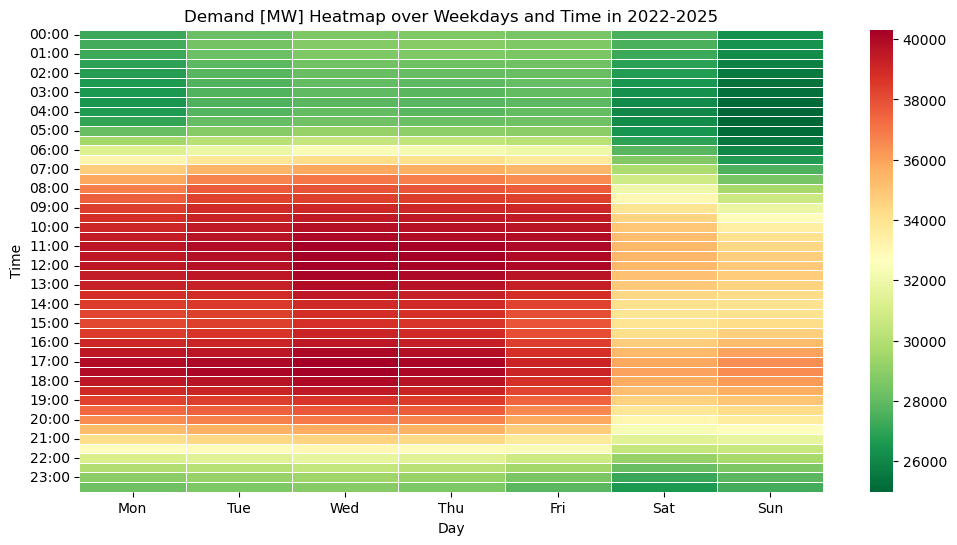

In [30]:
plt.figure(figsize=(12, 6))
sns.heatmap(mean_demand.T, cmap='RdYlGn_r', linewidths=.5, annot=False, fmt=".1f")
plt.title('Demand [MW] Heatmap over Weekdays and Time in 2022-2025')
plt.xlabel('Day')
plt.ylabel('Time')
plt.show()

In [31]:
mean_wind = df_filtered.groupby(['weekday', 'time'])['wind'].mean().unstack()

# bring the Dataframe in the correct order
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

mean_wind.index = pd.CategoricalIndex(mean_wind.index, categories=weekday_order, ordered=True)

mean_wind = mean_wind.sort_index()

mean_wind


time,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,05:00,05:30,06:00,06:30,07:00,07:30,08:00,08:30,09:00,09:30,10:00,10:30,11:00,11:30,12:00,12:30,13:00,13:30,14:00,14:30,15:00,15:30,16:00,16:30,17:00,17:30,18:00,18:30,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
weekday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mon,9435.950820,9338.524590,9212.163934,9105.786885,9026.131148,8940.344262,8862.967213,8793.688525,8703.245902,8636.819672,8701.754098,8783.049180,8814.934426,8855.327869,8853.803279,8899.639344,8911.950820,8998.606557,9028.852459,9111.737705,9158.377049,9290.655738,9409.196721,9499.983607,9568.672131,9641.245902,9698.327869,9738.983607,9765.016393,9741.557377,9733.672131,9725.065574,9715.852459,9679.475410,9655.983607,9636.852459,9560.442623,9498.262295,9469.836066,9443.983607,9414.590164,9417.180328,9400.770492,9345.819672,9278.836066,9194.918033,9131.754098,9056.180328
Tue,8942.934426,8859.000000,8791.098361,8695.786885,8629.245902,8592.360656,8553.590164,8524.754098,8504.049180,8476.016393,8439.754098,8494.409836,8503.098361,8536.672131,8592.737705,8634.967213,8674.311475,8722.672131,8772.459016,8837.852459,8849.409836,8863.557377,8908.803279,8946.918033,8987.704918,9001.311475,9030.229508,9063.213115,9051.868852,9057.426230,9033.098361,8989.540984,8932.016393,8932.950820,8986.852459,9005.967213,9013.344262,8978.934426,9016.606557,9066.377049,9072.114754,9124.262295,9143.196721,9127.885246,9088.655738,9000.409836,8943.459016,8935.901639
Wed,9175.258065,9212.161290,9254.096774,9230.419355,9260.516129,9278.032258,9327.758065,9333.951613,9345.629032,9359.016129,9403.451613,9434.435484,9460.354839,9545.983871,9592.677419,9618.129032,9629.048387,9682.209677,9778.354839,9810.935484,9835.387097,9928.725806,9963.548387,9993.451613,9995.145161,10047.725806,10070.500000,10062.612903,10035.225806,9963.000000,9893.532258,9876.403226,9842.822581,9838.887097,9800.354839,9764.741935,9694.161290,9668.500000,9621.661290,9600.161290,9639.709677,9648.645161,9605.935484,9548.064516,9504.209677,9428.838710,9348.774194,9227.677419
Thu,9115.322581,9009.758065,8916.241935,8879.967742,8748.532258,8620.000000,8561.741935,8513.483871,8441.161290,8404.564516,8404.370968,8403.612903,8399.596774,8405.177419,8458.451613,8494.032258,8561.145161,8657.903226,8761.387097,8866.548387,8982.145161,9057.790323,9149.161290,9257.677419,9342.580645,9425.048387,9494.403226,9512.596774,9495.709677,9533.322581,9547.241935,9537.129032,9379.524590,9306.245902,9272.426230,9233.721311,9188.524590,9113.229508,9032.868852,8943.622951,8859.557377,8791.081967,8740.819672,8684.360656,8596.295082,8557.180328,8512.885246,8428.311475
Fri,8407.901639,8418.049180,8426.901639,8438.295082,8439.377049,8442.475410,8445.967213,8415.901639,8401.918033,8408.885246,8442.491803,8504.180328,8584.163934,8637.295082,8711.688525,8828.590164,8934.918033,9049.081967,9100.934426,9183.245902,9268.590164,9390.245902,9494.262295,9600.557377,9675.426230,9747.770492,9821.721311,9827.901639,9828.737705,9756.475410,9713.213115,9671.377049,9628.180328,9599.737705,9581.278689,9564.475410,9515.983607,9499.409836,9472.983607,9465.967213,9457.491803,9364.983607,9269.180328,9212.622951,9109.983607,9025.049180,8938.737705,8837.491803
Sat,8820.306452,8754.951613,8716.419355,8698.193548,8679.354839,8673.790323,8625.403226,8587.451613,8527.758065,8536.500000,8565.016129,8598.854839,8592.193548,8614.516129,8610.193548,8628.290323,8662.661290,8709.564516,8786.225806,8826.451613,8861.677419,8919.564516,8969.354839,9051.951613,9078.677419,9095.967742,9136.580645,9149.564516,9125.983871,9134.112903,9134.225806,9135.903226,9133.322581,9164.000000,9191.741935,9209.661290,9188.580645,9206.870968,9216.096774,9214.419355,9224.580645,9215.870968,9234.580645,9229.177419,9167.338710,9083.645161,8993.177419,8887.403226
Sun,8752.459016,8701.983607,8683.131148,8657.803279,8665.934426,8626.983607,8637.950820,8691.196721,8719.442623,8743.032787,8717.147541,8790.229508,8855.655738,8898.50

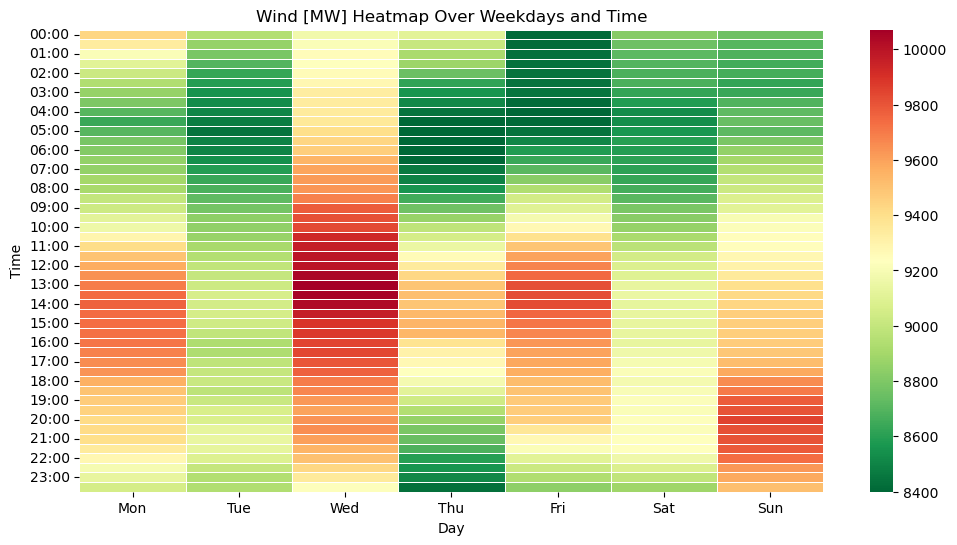

In [32]:
plt.figure(figsize=(12, 6))
sns.heatmap(mean_wind.T, cmap='RdYlGn_r', linewidths=.5, annot=False, fmt=".1f")
plt.title('Wind [MW] Heatmap Over Weekdays and Time')
plt.xlabel('Day')
plt.ylabel('Time')
plt.show()

In [33]:
net_demand= mean_demand - mean_wind
net_demand

time,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,05:00,05:30,06:00,06:30,07:00,07:30,08:00,08:30,09:00,09:30,10:00,10:30,11:00,11:30,12:00,12:30,13:00,13:30,14:00,14:30,15:00,15:30,16:00,16:30,17:00,17:30,18:00,18:30,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
weekday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mon,17803.721311,18019.786885,17992.065574,17820.950820,17738.262295,17676.754098,17721.163934,17687.754098,17954.426230,18412.196721,19440.377049,20708.967213,22513.327869,24302.180328,25881.885246,26945.573770,27922.049180,28566.295082,29378.754098,29705.770492,29931.213115,30093.245902,30217.213115,30067.393443,29987.688525,29740.918033,29562.540984,29118.196721,28710.475410,28488.360656,28459.737705,28789.344262,29366.377049,29888.918033,30260.426230,30266.918033,30014.459016,29505.098361,28819.049180,27929.688525,27078.180328,25879.754098,24796.950820,23356.180328,21922.049180,20701.229508,19833.163934,19268.409836
Tue,19223.131148,19483.836066,19401.409836,19207.377049,19143.344262,19067.049180,19102.426230,19058.032787,19204.278689,19590.393443,20389.311475,21625.836066,23419.180328,25284.475410,26880.032787,28042.836066,29047.836066,29596.967213,30165.655738,30395.934426,30622.049180,30817.344262,30985.590164,30864.885246,30757.491803,30553.262295,30247.163934,29832.426230,29503.163934,29330.245902,29360.459016,29697.016393,30239.688525,30687.524590,31056.065574,31078.032787,30698.229508,30163.459016,29433.524590,28491.540984,27670.508197,26471.983607,25257.344262,23709.655738,22319.934426,21109.409836,20270.934426,19694.606557
Wed,19438.677419,19546.919355,19391.661290,19077.177419,18881.467742,18746.790323,18625.112903,18517.564516,18637.322581,18959.951613,19783.274194,21089.629032,22940.564516,24705.967742,26245.370968,27341.903226,28265.451613,28714.661290,29326.193548,29620.596774,29956.967742,30097.741935,30327.903226,30306.177419,30318.306452,30128.516129,29841.338710,29433.258065,28998.129032,28892.983871,28908.241935,29239.854839,29723.306452,30212.887097,30505.322581,30516.596774,30278.096774,29753.951613,29016.806452,28193.338710,27309.500000,26094.629032,24945.500000,23513.838710,22203.548387,21035.193548,20100.838710,19633.693548
Thu,19570.612903,19813.806452,19719.967742,19417.725806,19298.209677,19271.951613,19285.806452,19237.548387,19402.161290,19782.258065,20624.096774,21979.612903,23829.838710,25726.903226,27243.580645,28290.000000,29238.193548,29755.419355,30327.451613,30609.016129,30787.145161,30885.435484,31092.725806,31032.403226,30902.241935,30618.064516,30263.000000,29838.967742,29471.580645,29263.209677,29147.306452,29361.790323,29968.688525,30474.163934,30831.327869,30824.688525,30477.229508,30047.950820,29459.737705,28731.655738,27832.377049,26759.950820,25584.344262,24164.721311,22834.491803,21614.245902,20732.508197,20194.196721
Fri,20098.163934,20246.606557,20129.590164,19851.918033,19685.950820,19602.967213,19542.098361,19473.885246,19580.803279,19910.737705,20533.950820,21668.049180,23364.426230,25046.540984,26709.180328,27701.868852,28688.393443,29294.754098,29975.950820,30262.901639,30444.540984,30545.901639,30574.737705,30397.704918,30354.147541,29919.721311,29520.672131,29037.639344,28466.819672,28222.442623,28107.557377,28312.491803,28793.655738,29213.081967,29563.000000,29568.901639,29246.180328,28734.262295,27987.950820,27131.786885,26310.655738,25383.918033,24414.836066,23175.278689,21669.868852,20521.819672,19610.262295,18995.131148
Sat,18682.919355,18765.709677,18523.548387,18170.822581,18004.532258,17819.758065,17677.677419,17503.016129,17511.790323,17591.854839,17881.112903,18360.290323,19201.161290,20109.145161,21206.774194,22198.016129,23327.241935,24252.645161,25176.048387,25702.193548,26068.370968,26271.693548,26432.112903,26394.564516,26299.370968,26061.564516,25691.919355,25288.016129,24993.516129,24773.209677,24772.596774,25022.822581,25646.112903,26232.370968,26688.870968,26746.741935,26520.096774,25996.806452,25353.080645,

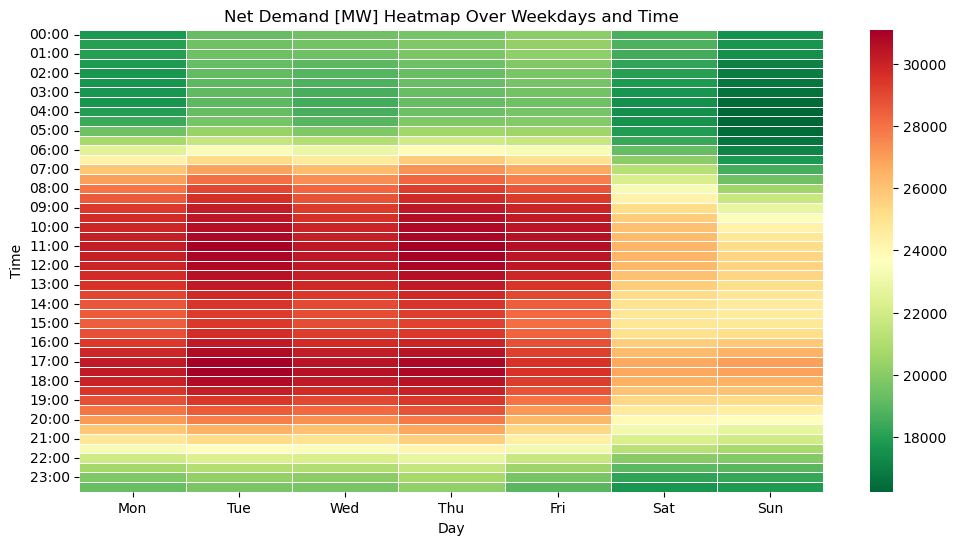

In [34]:
plt.figure(figsize=(12, 6))
sns.heatmap(net_demand.T, cmap='RdYlGn_r', linewidths=.5, annot=False, fmt=".1f")
plt.title('Net Demand [MW] Heatmap Over Weekdays and Time')
plt.xlabel('Day')
plt.ylabel('Time')
plt.show()

In [35]:
# I look at all years. Because there are more and more windfarms and solarparks built, the last years will have higher generation and also are weighted higher automatically
mean_wind_solar_time = df.groupby('time')[['wind', 'solar']].mean().reset_index()

mean_wind_solar_time

,time,wind,solar
0,00:00,4682.398714,0.000000
1,00:30,4663.029954,0.000000
2,01:00,4646.438145,0.000000
3,01:30,4630.009139,0.000000
4,02:00,4613.160095,0.000000
5,02:30,4600.790151,0.000000
6,03:00,4594.889660,0.000000
7,03:30,4584.779320,0.001354
8,04:00,4575.920968,2.902522
9,04:30,4570.912845,21.646979


In [64]:
correlation1 = mean_wind_solar_time['wind'].corr(mean_wind_solar_time['solar']).round(2)
correlation1

0.56

In [36]:
df[["wind","solar","demand"]].describe().round()

,wind,solar,demand
count,283616.0,283616.0,283616.0
mean,4830.0,862.0,34587.0
std,4531.0,1747.0,7211.0
min,1.0,0.0,16967.0
25%,1264.0,0.0,28981.0
50%,3368.0,0.0,34334.0
75%,7047.0,788.0,39653.0
max,22510.0,11498.0,59577.0


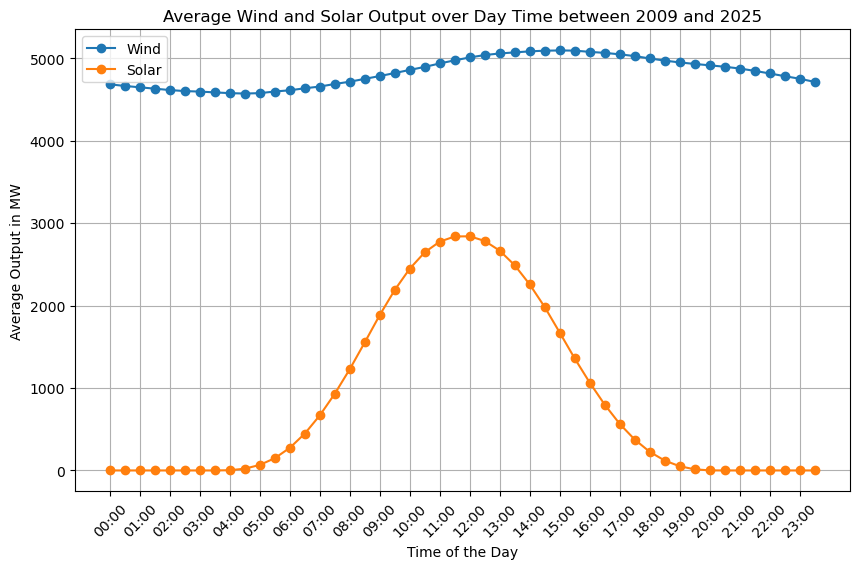

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(mean_wind_solar_time['time'], mean_wind_solar_time['wind'], marker='o', label='Wind')
plt.plot(mean_wind_solar_time['time'], mean_wind_solar_time['solar'], marker='o', label='Solar')

# Diagrammbeschriftungen hinzufügen
plt.title('Average Wind and Solar Output over Day Time between 2009 and 2025')
plt.xlabel('Time of the Day')
plt.ylabel('Average Output in MW')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
xticks = mean_wind_solar_time['time'][::2]  # Slice every second element
plt.xticks(ticks=xticks, rotation=45)
plt.show()

In [38]:
mean_wind_solar_per_month_all = df.groupby('month')[['wind', 'solar']].mean()


month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

mean_wind_solar_per_month_all.index = pd.CategoricalIndex(mean_wind_solar_per_month_all.index, categories=month_order, ordered=True)

mean_wind_solar_per_month_all = mean_wind_solar_per_month_all.sort_index()
mean_wind_solar_per_month_all = mean_wind_solar_per_month_all.reset_index()

mean_wind_solar_per_month_all

,month,wind,solar
0,Jan,6126.056570,291.958254
1,Feb,6556.105469,515.977821
2,Mar,5171.941030,812.274294
3,Apr,4202.572396,1228.596788
4,May,3490.934266,1396.421119
5,Jun,3297.113281,1441.002257
6,Jul,3149.100260,1367.146421
7,Aug,3689.763861,1211.547127
8,Sep,4215.343576,963.299870
9,Oct,5573.621136,610.717700


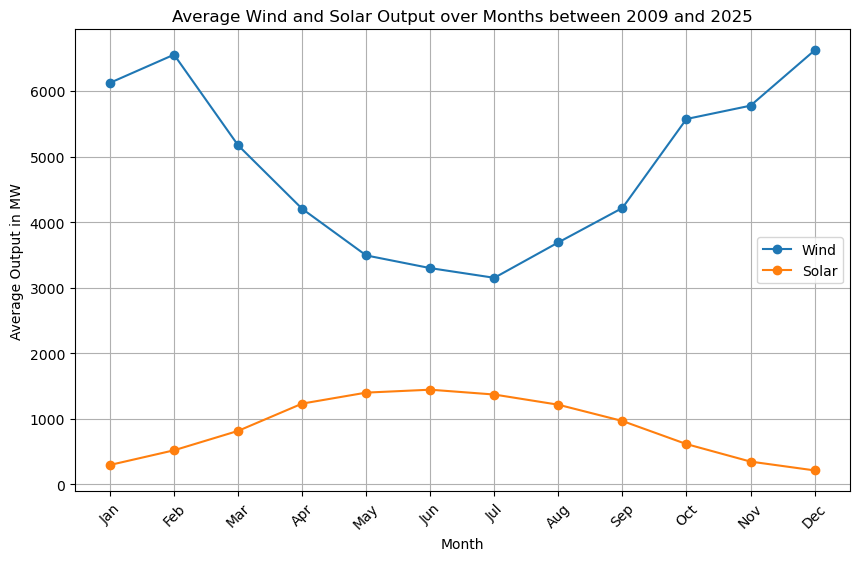

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(mean_wind_solar_per_month_all['month'], mean_wind_solar_per_month_all['wind'], marker='o', label='Wind')
plt.plot(mean_wind_solar_per_month_all['month'], mean_wind_solar_per_month_all['solar'], marker='o', label='Solar')

# Diagrammbeschriftungen hinzufügen
plt.title('Average Wind and Solar Output over Months between 2009 and 2025')
plt.xlabel('Month')
plt.ylabel('Average Output in MW')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [63]:
correlation2 = mean_wind_solar_per_month_all['wind'].corr(mean_wind_solar_per_month_all['solar']).round(2)
correlation2

-0.96

looking for 2022-2025 again

In [40]:
mean_wind_solar_demand_per_month = df_filtered.groupby('month')[['wind', 'solar', 'demand']].mean()

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

mean_wind_solar_demand_per_month.index = pd.CategoricalIndex(mean_wind_solar_demand_per_month.index, categories=month_order, ordered=True)
mean_wind_solar_demand_per_month = mean_wind_solar_demand_per_month.sort_index()
mean_wind_solar_demand_per_month['net_demand-wind'] = mean_wind_solar_demand_per_month['demand'] - mean_wind_solar_demand_per_month['wind']
mean_wind_solar_demand_per_month['net_demand-wind-solar'] = mean_wind_solar_demand_per_month['demand'] - mean_wind_solar_demand_per_month['wind']- mean_wind_solar_demand_per_month['solar']
mean_wind_solar_demand_per_month = mean_wind_solar_demand_per_month.reset_index()
mean_wind_solar_demand_per_month









,month,wind,solar,demand,net_demand-wind,net_demand-wind-solar
0,Jan,10189.382056,567.963710,37631.645161,27442.263105,26874.299395
1,Feb,13198.915923,877.643601,36860.796875,23661.880952,22784.237351
2,Mar,8229.840341,1764.903409,34213.196023,25983.355682,24218.452273
3,Apr,7485.318056,2105.092361,32158.948611,24673.630556,22568.538194
4,May,7702.198253,2168.366263,31728.479167,24026.280914,21857.914651
5,Jun,6559.672222,2490.993750,31049.857639,24490.185417,21999.191667
6,Jul,5921.190860,2375.754032,31181.938844,25260.747984,22884.993952
7,Aug,4768.380376,2289.736559,30064.903898,25296.523522,23006.786962
8,Sep,7634.831944,1553.957639,31640.497917,24005.665972,22451.708333
9,Oct,11468.652554,1189.261425,31796.260753,20327.608199,19138.346774


October had the smalles residual load between 2022-2025

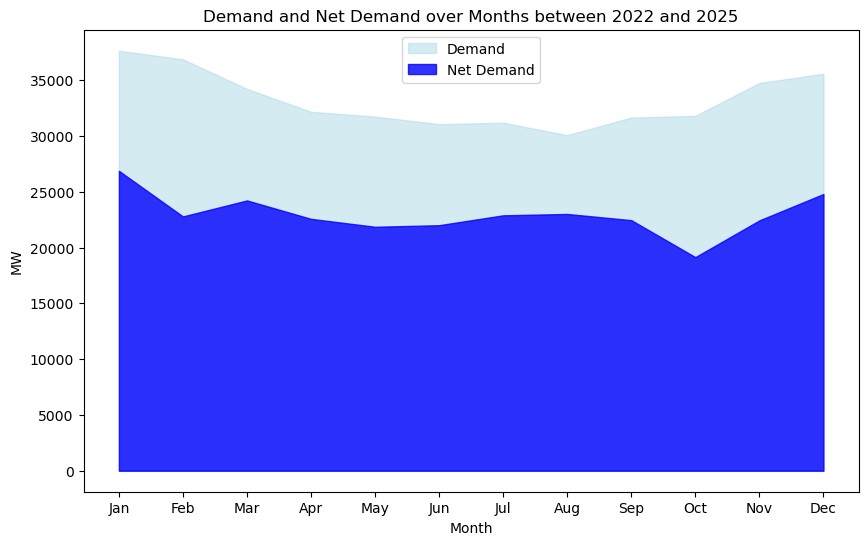

In [66]:

# Create month indices for x-axis
months_axis = np.arange(len(mean_wind_solar_demand_per_month['month']))

# Plotting
plt.figure(figsize=(10, 6))

# Fill area for demand
plt.fill_between(months_axis, mean_wind_solar_demand_per_month['demand'], color='lightblue', alpha=0.5, label='Demand')

# Fill area for net demand
plt.fill_between(months_axis, mean_wind_solar_demand_per_month['net_demand-wind-solar'], color='blue', alpha=0.8, label='Net Demand')

# Add labels and customize x-ticks
plt.xticks(months_axis, mean_wind_solar_demand_per_month['month'])  # Sets the x-ticks to the month names
plt.ylabel('MW')
plt.xlabel('Month')
plt.title('Demand and Net Demand over Months between 2022 and 2025')
plt.legend()
plt.show()

Boxplot Analysis for how many percentage wind will cover demand for every 30min in df_filtered 

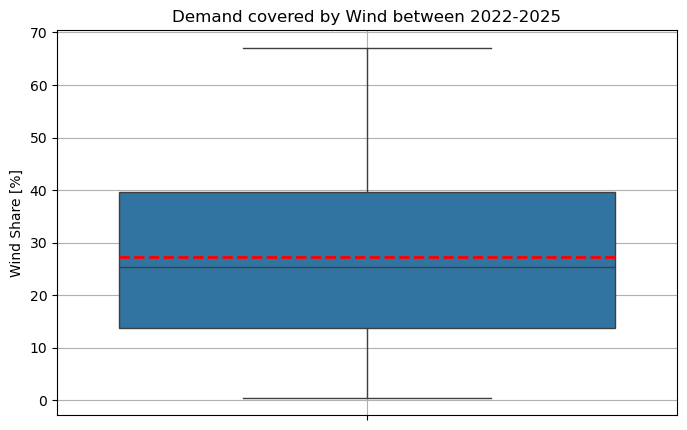

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_filtered['wind_perc'], showmeans=True, meanline=True,
            meanprops={"color": "red", "linewidth": 2, "linestyle": "--"})
plt.title('Demand covered by Wind between 2022-2025')
plt.ylabel('Wind Share [%]')
plt.grid(True)
plt.show()

In [43]:
df_filtered["wind_perc"].skew().round(2)


0.31

Skewness > 0: The distribution is positively skewed (or right-skewed), meaning there is a longer tail on the right side of the distribution. The mass of the distribution is concentrated on the left of the figure.

In [44]:
df_filtered["wind_perc"].mean().round(2) # red in boxplot

27.3

In [45]:
df_filtered["wind_perc"].median() #black in boxplot

25.4

In [46]:
df_filtered["wind_perc"].mode()

0    11.9
Name: wind_perc, dtype: float64

In [47]:
df_filtered["wind_perc"].kurtosis().round(2)

-0.96

(negativ) Kurtosis < 0: The distribution is platykurtic. It has thinner tails and a flatter peak than the normal distribution, indicating fewer extreme values than expected in a normal distribution.

Same for solar

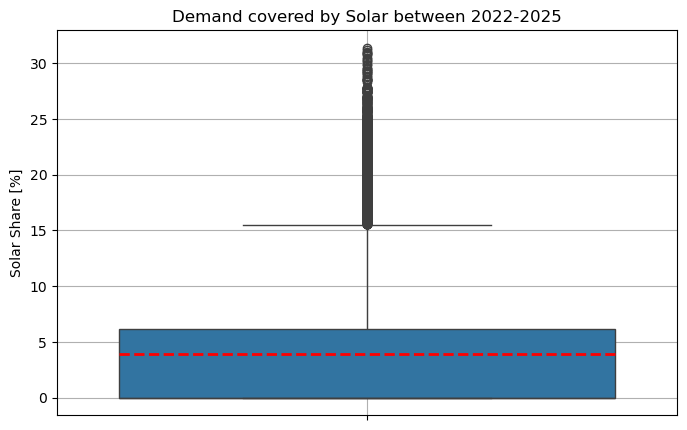

In [48]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_filtered['solar_perc'], showmeans=True, meanline=True,
            meanprops={"color": "red", "linewidth": 2, "linestyle": "--"})
plt.title('Demand covered by Solar between 2022-2025')
plt.ylabel('Solar Share [%]')
plt.grid(True)
plt.show()

In [49]:
df_filtered["solar_perc"].skew().round(2)

1.66

In [50]:
df_filtered["solar_perc"].mean().round(2) # red in boxplot

3.95

In [51]:
df_filtered["solar_perc"].median() #black in boxplot

0.0

In [52]:
df_filtered["solar_perc"].mode()

0    0.0
Name: solar_perc, dtype: float64

In [53]:
df_filtered["solar_perc"].kurtosis().round(2)

1.9

- Kurtosis > 0 : The distribution is leptokurtic. It has fatter tails and a sharper peak than the normal distribution, indicating more extreme values (outliers) than expected in a normal distribution.